># Trabalho de IA - Redes Neurais
 - Arthur Severo de Souza
 - Victor Le Roy Matos

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

~ Funções sigmoid e step ~

In [58]:
def sigmoid(x):
    if len(x) > 1:
        biggest = 0
        matrix = []
        for i in range(len(x)):
            if x[i] > biggest:
                biggest = x[i]
        for i in range(len(x)):
            if x[i] != biggest:
                matrix.append(0)
            else:
                matrix.append(1)
        return matrix
    else:
        return 1 / (1 + np.exp(-x))

def step(x):
    if len(x) > 1:
        return [1 if i >= 0 else 0 for i in x]
    else:
        return 1 if x >= 0 else 0

In [59]:
def define_d (targets, d_name):
    for targ in targets:
        if str(targ[1]) == str(d_name):
            d = targ[0]
            return d

~ Função de teste ~

In [60]:
def perceptron_test(input_t, target, w, b, test_type):
        correct = 0
        for i in range(len(input_t)):
            d_name = input_t[i][1]
            # d = [d for d in target if d[1] == d_name][0][0]
            d = define_d(target, d_name)
            x = np.dot(w, input_t[i][0].T) + b
            # print ('x = ' + str(x))
            if test_type == 'step':
                y = step(x)
            elif test_type == 'sigmoid':
                y = sigmoid(x)
            e = np.subtract(d, y)
            # print('e = ' + str(e) + ' d = ' + str(d) + ' y = ' + str(y))
            test = 0
            for err in e:
                if err != 0:
                    test = 1
            if test == 0:
                correct += 1
                # print("CORRETO")
        N = len(input_t)
        correct_rate = (correct/N) * 100
        return correct, correct_rate

~ Função de treino ~

In [61]:
def perceptron(epochs, inputs, targets, learning_rate, test_type):
        w = np.random.uniform(-1,1, size=(len(targets), len(inputs[0][0])))
        b = np.random.uniform(-1,1, size=(len(targets)))
        t = 0
        y = 0
        e = 0
        ve = []
        erro_total = 1
        while (t < epochs and erro_total > 0):
            erro_total = 0
            for i in range(len(inputs)):
                x = inputs[i][0]
                d_name = inputs[i][1]
                d = define_d(targets, d_name)
                # print('x = ' + str(x) + ' d = ' + str(d) + ' d_name = ' + str(d_name))
                out = np.dot(w, x.T) + b
                # print('saida = ' + str(saida))
                if test_type == 'step':
                    y = step(out)
                elif test_type == 'sigmoid':
                    y = sigmoid(out)
                # print('y = ' + str(y))
                e = np.subtract(d, y)
                # print('e = ' + str(e))
                e_quad = np.dot(e, e.T)
                erro_total = erro_total + e_quad
                # print('E = ' + str(erro_total))
                update_w = learning_rate * np.dot(e.reshape(len(e), 1), x.reshape(1, len(x)))
                w = w + update_w
                # print('weights = ' + str(w))
                update_b = learning_rate * e
                b = b + update_b
                # print('bias = ' + str(b))
                # print("\n")
            ve.append(erro_total)
            t = t + 1
        return w, b, ve

~ Definindo dados de treino e teste ~

In [62]:
def define_train_test(df):

    d_label = df[7].unique()
    # print(d_label)

    d_target = []
    for i in reversed(range(d_label.size)):
        aux = []
        for j in reversed(range(d_label.size)):
            if(i == j): aux.append(1)
            else: aux.append(0)
        d_target.append( [aux, d_label[i]] )
    # print(d_target)

    x_kama_aux = df.loc[df[7] == d_label[0], 0:6].values
    x_rosa_aux = df.loc[df[7] == d_label[1], 0:6].values
    x_canadense_aux = df.loc[df[7] == d_label[2], 0:6].values
    # print(x_kama_aux.shape)
    # print(x_rosa_aux.shape)
    # print(x_canadense_aux.shape)

    x_kama = []
    for i in range(len(x_kama_aux)):
        x_kama.append([x_kama_aux[i], '1'])
    
    x_rosa = []
    for i in range(len(x_rosa_aux)):
        x_rosa.append([x_rosa_aux[i], '2'])
    
    x_canadense = []
    for i in range(len(x_canadense_aux)):
        x_canadense.append([x_canadense_aux[i], '3'])
    
    size_train_dh = int(len(x_kama) * 0.7)
    size_train_sl = int(len(x_rosa) * 0.7)
    size_train_no = int(len(x_canadense) * 0.7)

    random.shuffle(x_kama)
    x_kama_train = x_kama[:size_train_dh]
    x_kama_test = x_kama[size_train_dh:]

    random.shuffle(x_rosa)
    x_rosa_train = x_rosa[:size_train_sl]
    x_rosa_test = x_rosa[size_train_sl:]

    random.shuffle(x_canadense)
    x_canadense_train = x_canadense[:size_train_no]
    x_canadense_test = x_canadense[size_train_no:]

    x_train = []
    x_train.extend(x_kama_train)
    x_train.extend(x_rosa_train)
    x_train.extend(x_canadense_train)
    random.shuffle(x_train)

    x_test = []
    x_test.extend(x_kama_test)
    x_test.extend(x_rosa_test)
    x_test.extend(x_canadense_test)
    random.shuffle(x_test)

    return x_train, x_test, d_target

~ Main ~

weight_step = [[-35.8894666   16.36027089   4.23043437   8.88460119   2.88601079
   16.21339699  23.80812767]
 [ 40.23167363 -36.992289    -9.05929202 -17.41800464 -11.39288128
    7.86996778   8.27751896]
 [ -6.51049554  22.64398878   6.42476726   7.80431591  16.33717367
   -9.33388208 -55.11185856]]
bias_step = [ 4.56513926 -8.50444562  3.3111217 ]
correct_step = 49
correct_rate_step = 77.77777777777779


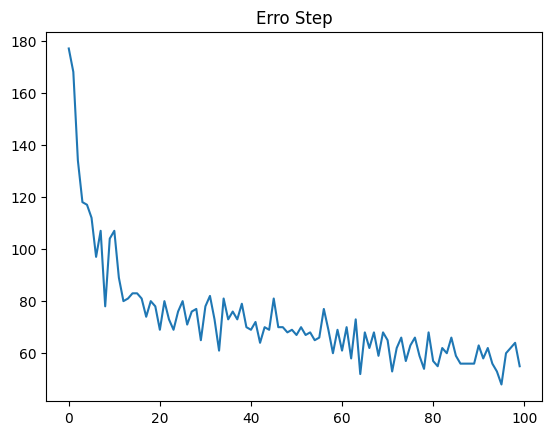



weight_sigmoid = [[-48.49702516  25.78948645   5.19010346  14.59577512   3.18336079
   12.94934271  30.12892691]
 [ 54.91483146 -44.38860985  -9.11625923 -22.09502383 -12.84685146
    1.28647854   6.40014772]
 [ -4.30997861  19.17760748   5.53458994   6.93132685  10.80139848
  -15.42076056 -36.4705705 ]]
bias_sigmoid = [ 5.77709874 -9.92823312  3.91442847]
correct_sigmoid = 59
correct_rate_sigmoid = 93.65079365079364


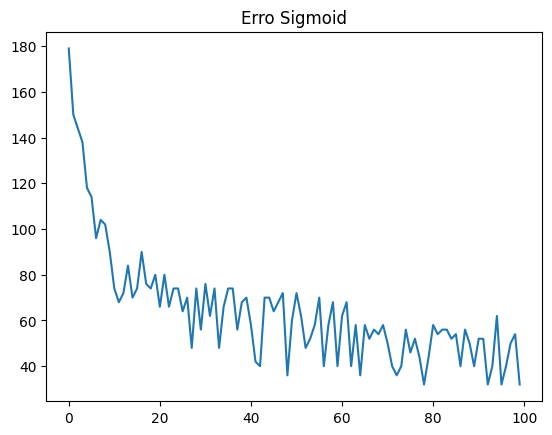

In [63]:
df_path = 'data/'
df = pd.read_csv(df_path + 'seeds_dataset.txt', sep='\t', header=None)
# print(df)
# define_train_test(df)

x_train, x_test, d_target = define_train_test(df)
# print('x_train = \n' + str(x_train))
# print('x_test = \n' + str(x_test))
# print('d_target = \n' + str(d_target))

epochs = 100
learning_rate = 0.1

weight_step, bias_step, err_step  = perceptron(epochs, x_train, d_target, learning_rate, 'step')
print('weight_step = ' + str(weight_step))
print('bias_step = ' + str(bias_step))
correct_step, correct_rate_step = perceptron_test(x_test, d_target, weight_step, bias_step, 'step')
print('correct_step = ' + str(correct_step))
print('correct_rate_step = ' + str(correct_rate_step))

plt.plot(err_step, label='Erro')
plt.title('Erro Step')
plt.show()

print('\n')

weight_sigmoid, bias_sigmoid, err_sigmoid = perceptron(epochs, x_train, d_target, learning_rate, 'sigmoid')
print('weight_sigmoid = ' + str(weight_sigmoid))
print('bias_sigmoid = ' + str(bias_sigmoid))
correct_sigmoid, correct_rate_sigmoid = perceptron_test(x_test, d_target, weight_sigmoid, bias_sigmoid, 'sigmoid')
print('correct_sigmoid = ' + str(correct_sigmoid))
print('correct_rate_sigmoid = ' + str(correct_rate_sigmoid))

plt.plot(err_sigmoid, label='Erro')
plt.title('Erro Sigmoid')
plt.show()